In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn import tree

# Data preprocessing

In [2]:
data = pd.read_csv("mushrooms.csv")#("../input/mushrooms/mushrooms.csv")
print(f'Data shape: {data.shape}')
data.head().transpose()

Data shape: (8124, 23)


,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [3]:
data.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [4]:
data.drop(['veil-type'], axis = 1, inplace = True)

## Data binarizing

In [5]:
classes = sorted(data['class'].unique())
for i in data.columns:
    v = sorted(data[i].unique())
    data[i] = data[i].map({j: i for i,j in enumerate(v)})

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Heatmap of features

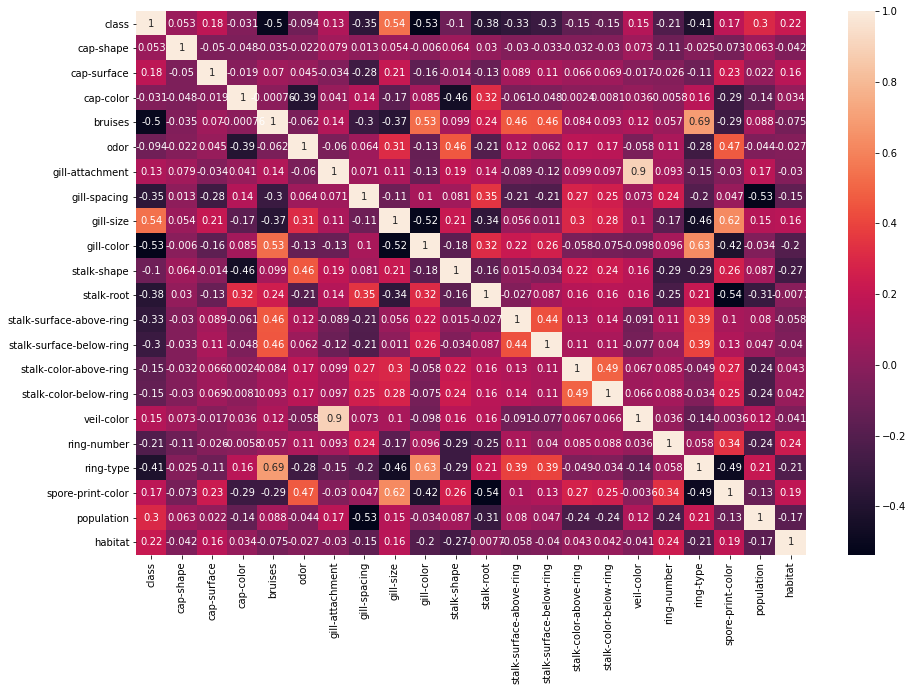

In [7]:
plt.figure(figsize=(15, 10))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Basic ml classification models
## Random Forest

In [8]:
# Train/test splitting
X, y = data.iloc[: , 1:], data.iloc[: , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("train accuracy:",rf_model.score(X_train,y_train))
print("test accuracy:",rf_model.score(X_test,y_test))

train accuracy: 1.0
test accuracy: 1.0


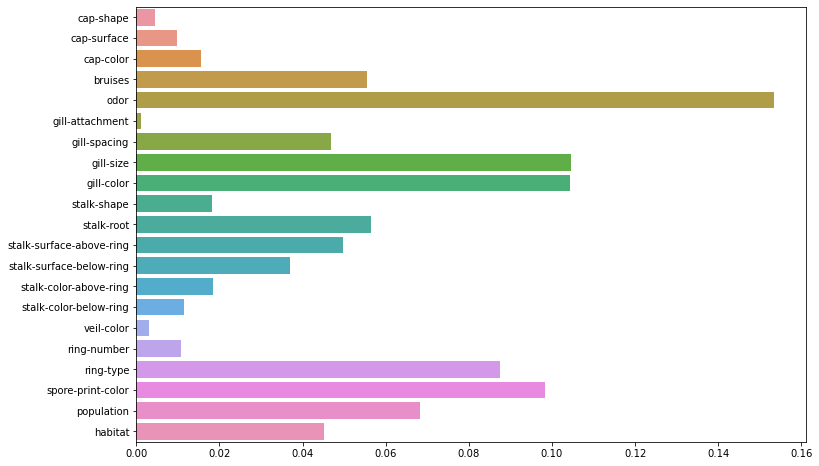

,Score
odor,0.153372
gill-size,0.104472
gill-color,0.104211
spore-print-color,0.098212
ring-type,0.087459
population,0.068360
stalk-root,0.056448
bruises,0.055560
stalk-surface-above-ring,0.049676
gill-spacing,0.046753


In [9]:
#Feature Importance & selection
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.show()
importance = pd.DataFrame(rf_model.feature_importances_, index = data.columns[1:], columns = ["Score"]).sort_values("Score", ascending = False)
importance.head(10)

In [10]:
#predictions
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test,rf_model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       831

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## First ten important features chosen (len(all_featureses) == 21)

In [11]:
X, y = data.loc[: , importance.index.tolist()[:10]], data.iloc[: , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("train accuracy:",rf_model.score(X_train,y_train))
print("test accuracy:",rf_model.score(X_test,y_test))

train accuracy: 1.0
test accuracy: 1.0


In [12]:
#predictions
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test,rf_model_preds))
print("Precision = {}".format(precision_score(y_test, rf_model_preds)))
print("Recall = {}".format(recall_score(y_test, rf_model_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, rf_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, rf_model_preds)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


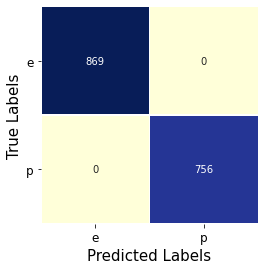

In [13]:
cm = confusion_matrix(y_test, rf_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Logistic regression

In [14]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
print("train accuracy:",log_reg_model.score(X_train,y_train))
print("test accuracy:",log_reg_model.score(X_test,y_test))

train accuracy: 0.9333743652869673
test accuracy: 0.9366153846153846


In [15]:
#predictions report
log_reg_preds = log_reg_model.predict(X_test)
print(classification_report(y_test,log_reg_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       869
           1       0.96      0.90      0.93       756

    accuracy                           0.94      1625
   macro avg       0.94      0.93      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [16]:
print("Precision = {}".format(precision_score(y_test, log_reg_preds)))
print("Recall = {}".format(recall_score(y_test, log_reg_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, log_reg_preds)))
print("F1 Score = {}".format(f1_score(y_test, log_reg_preds)))

Precision = 0.9566433566433566
Recall = 0.9047619047619048
Accuracy = 0.9366153846153846
F1 Score = 0.9299796057104011


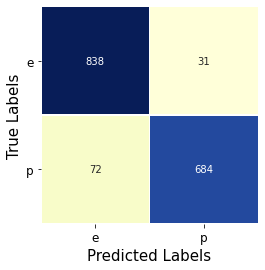

In [17]:
cm = confusion_matrix(y_test, log_reg_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Naive Bayes

In [18]:
nb_model = GaussianNB().fit(X_train,y_train)
print("train accuracy:",nb_model.score(X_train,y_train))
print("test accuracy:",nb_model.score(X_test,y_test))

train accuracy: 0.8862901984920757
test accuracy: 0.896


In [19]:
#predictions report
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       869
           1       0.96      0.81      0.88       756

    accuracy                           0.90      1625
   macro avg       0.91      0.89      0.89      1625
weighted avg       0.90      0.90      0.89      1625



In [20]:
print("Precision = {}".format(precision_score(y_test, nb_model_preds)))
print("Recall = {}".format(recall_score(y_test, nb_model_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, nb_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, nb_model_preds)))

Precision = 0.9593114241001565
Recall = 0.8108465608465608
Accuracy = 0.896
F1 Score = 0.8788530465949821


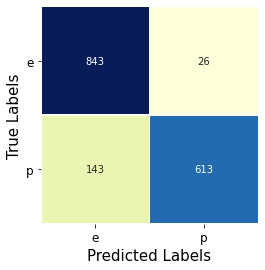

In [21]:
cm = confusion_matrix(y_test, nb_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Decision Tree Classifier

In [22]:
dec_tree = DecisionTreeClassifier().fit(X_train,y_train)
print("train accuracy:",dec_tree.score(X_train,y_train))
print("test accuracy:",dec_tree.score(X_test,y_test))

train accuracy: 1.0
test accuracy: 1.0


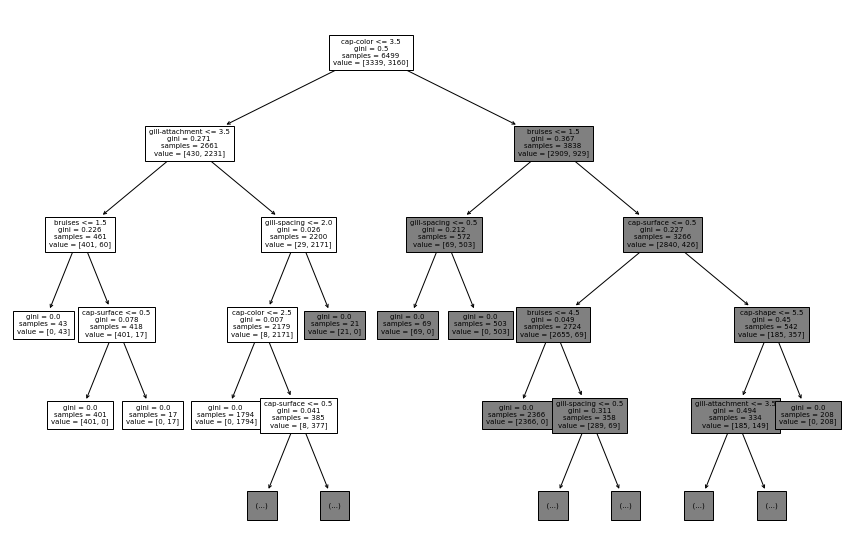

In [23]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dec_tree,fontsize = 7, feature_names = data.columns[1:], max_depth = 4)
fig = plt.gcf()
fig.savefig('tree.png')

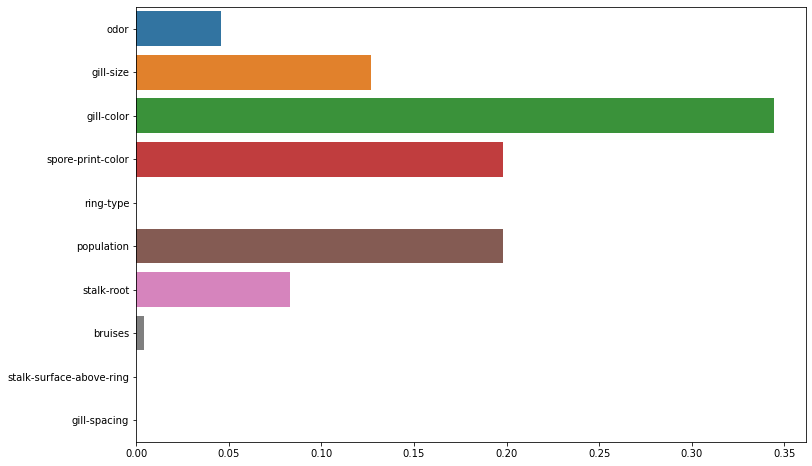

In [24]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=dec_tree.feature_importances_, y=X.columns)
plt.show()

In [25]:
dec_tree_preds = dec_tree.predict(X_test)
print(classification_report(y_test,dec_tree_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [26]:
print("Precision = {}".format(precision_score(y_test, dec_tree_preds)))
print("Recall = {}".format(recall_score(y_test, dec_tree_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, dec_tree_preds)))
print("F1 Score = {}".format(f1_score(y_test, dec_tree_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


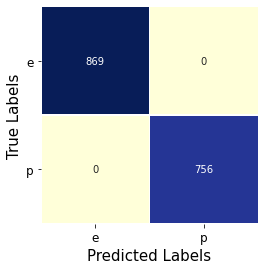

In [27]:
cm = confusion_matrix(y_test, dec_tree_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## dl model

In [28]:
X_train.shape

(6499, 10)

In [51]:
dl_model = Sequential()
dl_model.add(Dense(8, activation='relu', input_shape= (X_train.shape[1],)))
dl_model.add(Dense(5, activation='relu'))
dl_model.add(Dense(4, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

In [52]:
dl_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [53]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model_history=dl_model.fit(X_train,y_train,batch_size=10,epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
650/650 [==============================] - 3s 3ms/step - loss: 0.5322 - accuracy: 0.8213 - val_loss: 0.2307 - val_accuracy: 0.9003
Epoch 2/30
650/650 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9133 - val_loss: 0.1451 - val_accuracy: 0.9514
Epoch 3/30
650/650 [==============================] - 2s 2ms/step - loss: 0.1318 - accuracy: 0.9539 - val_loss: 0.1169 - val_accuracy: 0.9668
Epoch 4/30
650/650 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9676 - val_loss: 0.0864 - val_accuracy: 0.9766
Epoch 5/30
650/650 [==============================] - 2s 2ms/step - loss: 0.0732 - accuracy: 0.9751 - val_loss: 0.0615 - val_accuracy: 0.9840
Epoch 6/30
650/650 [==============================] - 2s 3ms/step - loss: 0.0530 - accuracy: 0.9860 - val_loss: 0.0539 - val_accuracy: 0.9766
Epoch 7/30
650/650 [==============================] - 2s 2ms/step - loss: 0.0451 - accuracy: 0.9835 - val_loss: 0.0459 - val_accuracy: 0.9815
Epoch 

Text(0, 0.5, 'Accuracy')

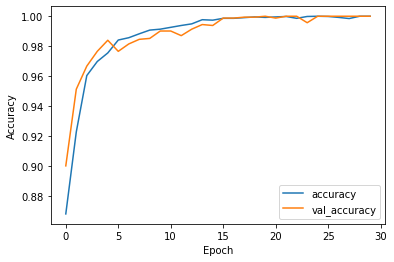

In [54]:
plt.plot(dl_model_history.history['accuracy'])
plt.plot(dl_model_history.history['val_accuracy'])
plt.legend(["accuracy",'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

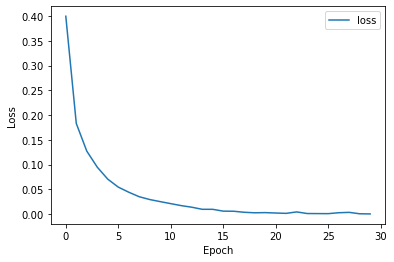

In [55]:
plt.plot(dl_model_history.history['loss'])
plt.legend(["loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [56]:
dl_model_preds = dl_model.predict(X_test)
print(classification_report(y_test,dl_model_preds.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [57]:
print("Precision = {}".format(precision_score(y_test, dl_model_preds.round())))
print("Recall = {}".format(recall_score(y_test, dl_model_preds.round())))
print("Accuracy = {}".format(accuracy_score(y_test, dl_model_preds.round())))
print("F1 Score = {}".format(f1_score(y_test, dl_model_preds.round())))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


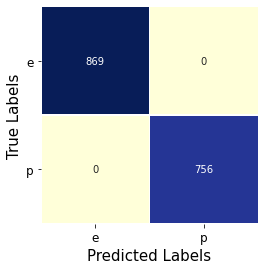

In [58]:
cm = confusion_matrix(y_test, dl_model_preds.round())
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()